In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
Age               918 non-null int64
Sex               918 non-null object
ChestPainType     918 non-null object
RestingBP         918 non-null int64
Cholesterol       918 non-null int64
FastingBS         918 non-null int64
RestingECG        918 non-null object
MaxHR             918 non-null int64
ExerciseAngina    918 non-null object
Oldpeak           918 non-null float64
ST_Slope          918 non-null object
HeartDisease      918 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.corr()['HeartDisease'].sort_values(ascending=False)

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64

In [6]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [39]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [7]:
dummy_1 = pd.get_dummies(df[['ChestPainType','Sex','RestingECG','ExerciseAngina','ST_Slope']], drop_first=True)

In [8]:
df = pd.concat([df,dummy_1], axis=1)
df.drop(['ChestPainType','Sex','RestingECG','ExerciseAngina','ST_Slope'], axis=1, inplace=True)

In [9]:
df.corr()['HeartDisease']

Age                  0.282039
RestingBP            0.107589
Cholesterol         -0.232741
FastingBS            0.267291
MaxHR               -0.400421
Oldpeak              0.403951
HeartDisease         1.000000
ChestPainType_ATA   -0.401924
ChestPainType_NAP   -0.212964
ChestPainType_TA    -0.054790
Sex_M                0.305445
RestingECG_Normal   -0.091580
RestingECG_ST        0.102527
ExerciseAngina_Y     0.494282
ST_Slope_Flat        0.554134
ST_Slope_Up         -0.622164
Name: HeartDisease, dtype: float64

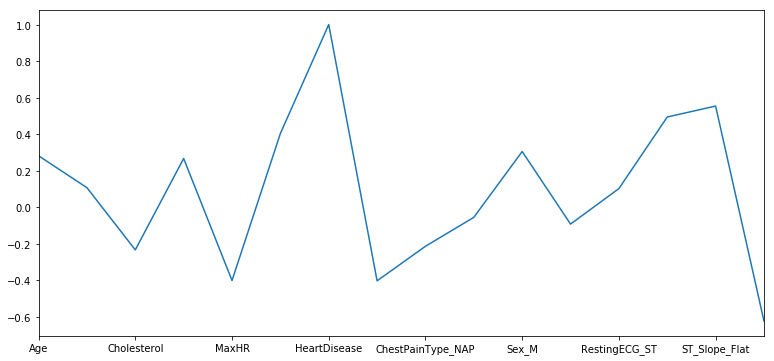

In [10]:
plt.figure(figsize=(13,6))
df.corr()['HeartDisease'].plot()

In [11]:
df.shape

(918, 16)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x = df.drop('HeartDisease', axis=1).values
y = df['HeartDisease'].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)

In [16]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau 

In [17]:
model_checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', save_weights_only=True,
                                            monitor='val_acc', mode='max', save_best_only=True,verbose=1, )

model_earlystopping_callback = EarlyStopping(monitor='val_loss', patience=2)

model_plateau_callback = ReduceLROnPlateau(monitor='val_loss', patience=2)

callback_list = [model_checkpoint_callback, model_earlystopping_callback, model_plateau_callback]

In [18]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout

Using TensorFlow backend.


In [27]:
model = Sequential()

model.add(Dense(64, activation = 'relu', input_dim = (df.shape[1]-1)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
model.fit(X_train, y_train, batch_size = 64, epochs = 128, validation_split = 0.15)

Train on 623 samples, validate on 111 samples
Epoch 1/128
623/623 [==============================] - 2s 2ms/step - loss: 0.7939 - acc: 0.5185 - val_loss: 0.7048 - val_acc: 0.5405
Epoch 2/128
623/623 [==============================] - 0s 49us/step - loss: 0.7124 - acc: 0.5987 - val_loss: 0.6998 - val_acc: 0.5495
Epoch 3/128
623/623 [==============================] - 0s 51us/step - loss: 0.7204 - acc: 0.5746 - val_loss: 0.7001 - val_acc: 0.5405
Epoch 4/128
623/623 [==============================] - 0s 51us/step - loss: 0.7473 - acc: 0.5698 - val_loss: 0.6905 - val_acc: 0.5405
Epoch 5/128
623/623 [==============================] - 0s 52us/step - loss: 0.7168 - acc: 0.5795 - val_loss: 0.6811 - val_acc: 0.5405
Epoch 6/128
623/623 [==============================] - 0s 49us/step - loss: 0.6857 - acc: 0.5795 - val_loss: 0.6793 - val_acc: 0.5405
Epoch 7/128
623/623 [==============================] - 0s 59us/step - loss: 0.6717 - acc: 0.6116 - val_loss: 0.6772 - val_acc: 0.5495
Epoch 8/128
623/6

In [29]:
df_model = pd.DataFrame(model.history.history)

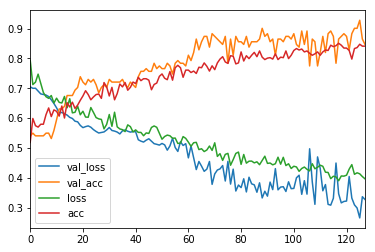

In [30]:
df_model.plot()

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
results = model.predict_classes(X_test)

In [33]:
print(classification_report(y_test, results))

              precision    recall  f1-score   support

           0       0.86      0.63      0.73        79
           1       0.77      0.92      0.84       105

    accuracy                           0.80       184
   macro avg       0.82      0.78      0.78       184
weighted avg       0.81      0.80      0.79       184



In [36]:
import seaborn as sns

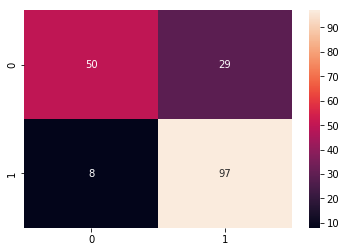

In [38]:
cf_matrix = confusion_matrix(y_test, results)
sns.heatmap(cf_matrix, annot=True, fmt='g')